# <font color='navy'> <b> Stemfie-X Example</b></font>
## <font color='teal'> <b> Small Toy Car </b></font>

### <font color='purple'> <b> Model assembly </b></font>

Implementation of the project
[STEMFIE project - Small Toy Car](https://www.stemfie.org/?view=article&id=221:new-stemfie-project-small-toy-car&catid=13) in the Stemfie-X library using CadQuery. The source code for the example is [here](./examples/05_simple_car.py).

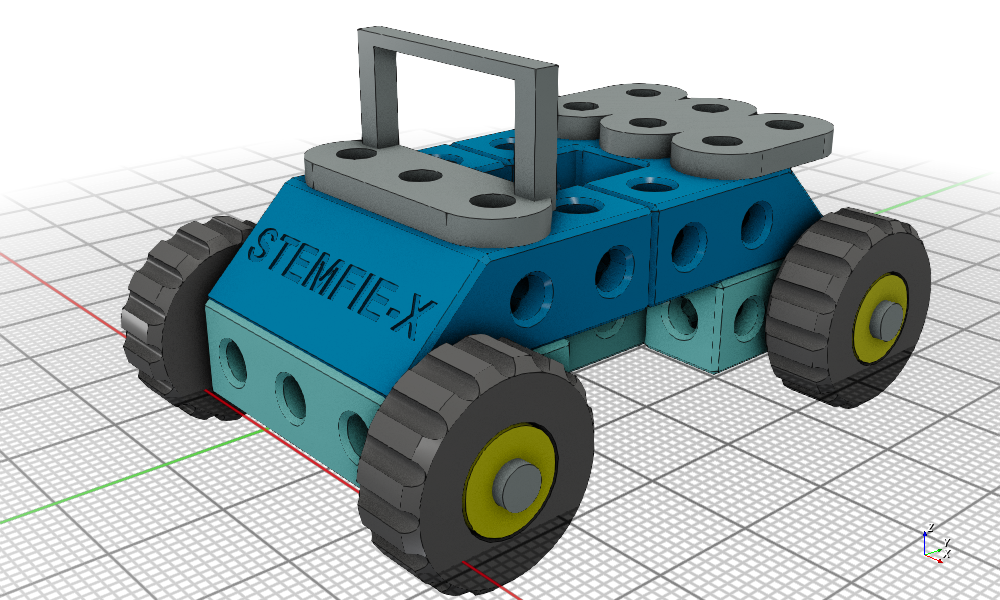

In [2]:
from IPython.display import Image
Image(filename='./img/simple_car_3.png', width=500)

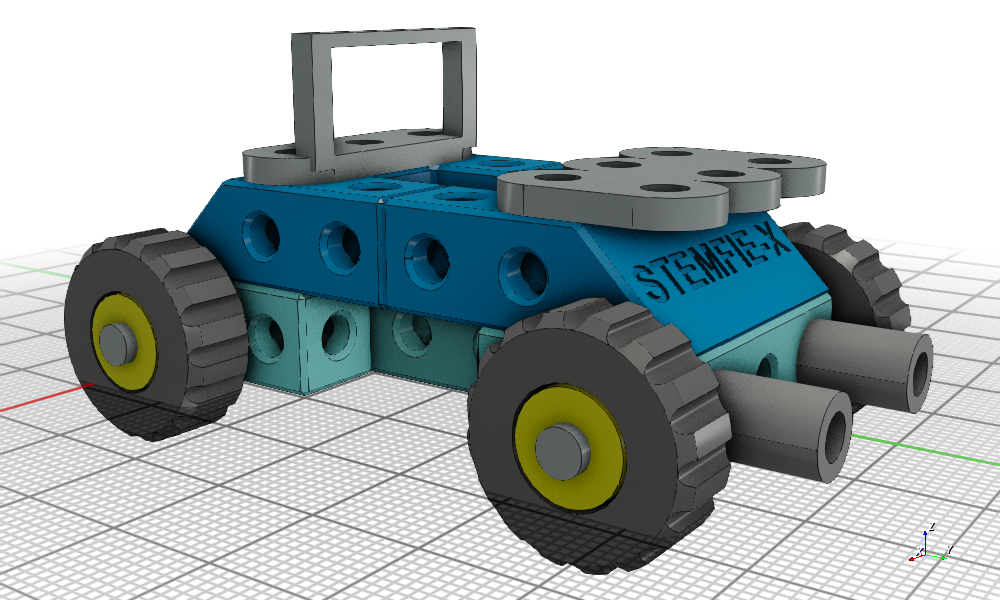

In [16]:
Image(filename='./img/simple_car_4.png', width=500)

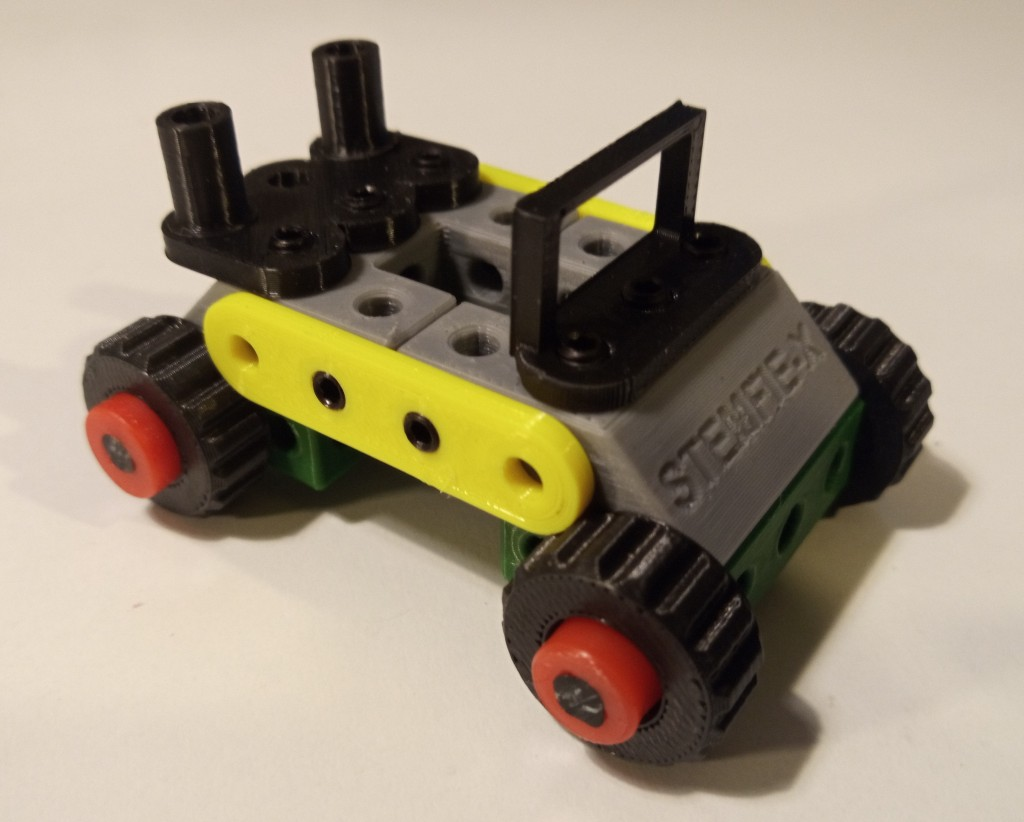

In [3]:
Image(filename='./img/small_car.jpg', width=500)

### <font color='purple'> <b> Model components </b></font>

Implementation of non-standard model components in the Python programming language using the Stemfie-X library

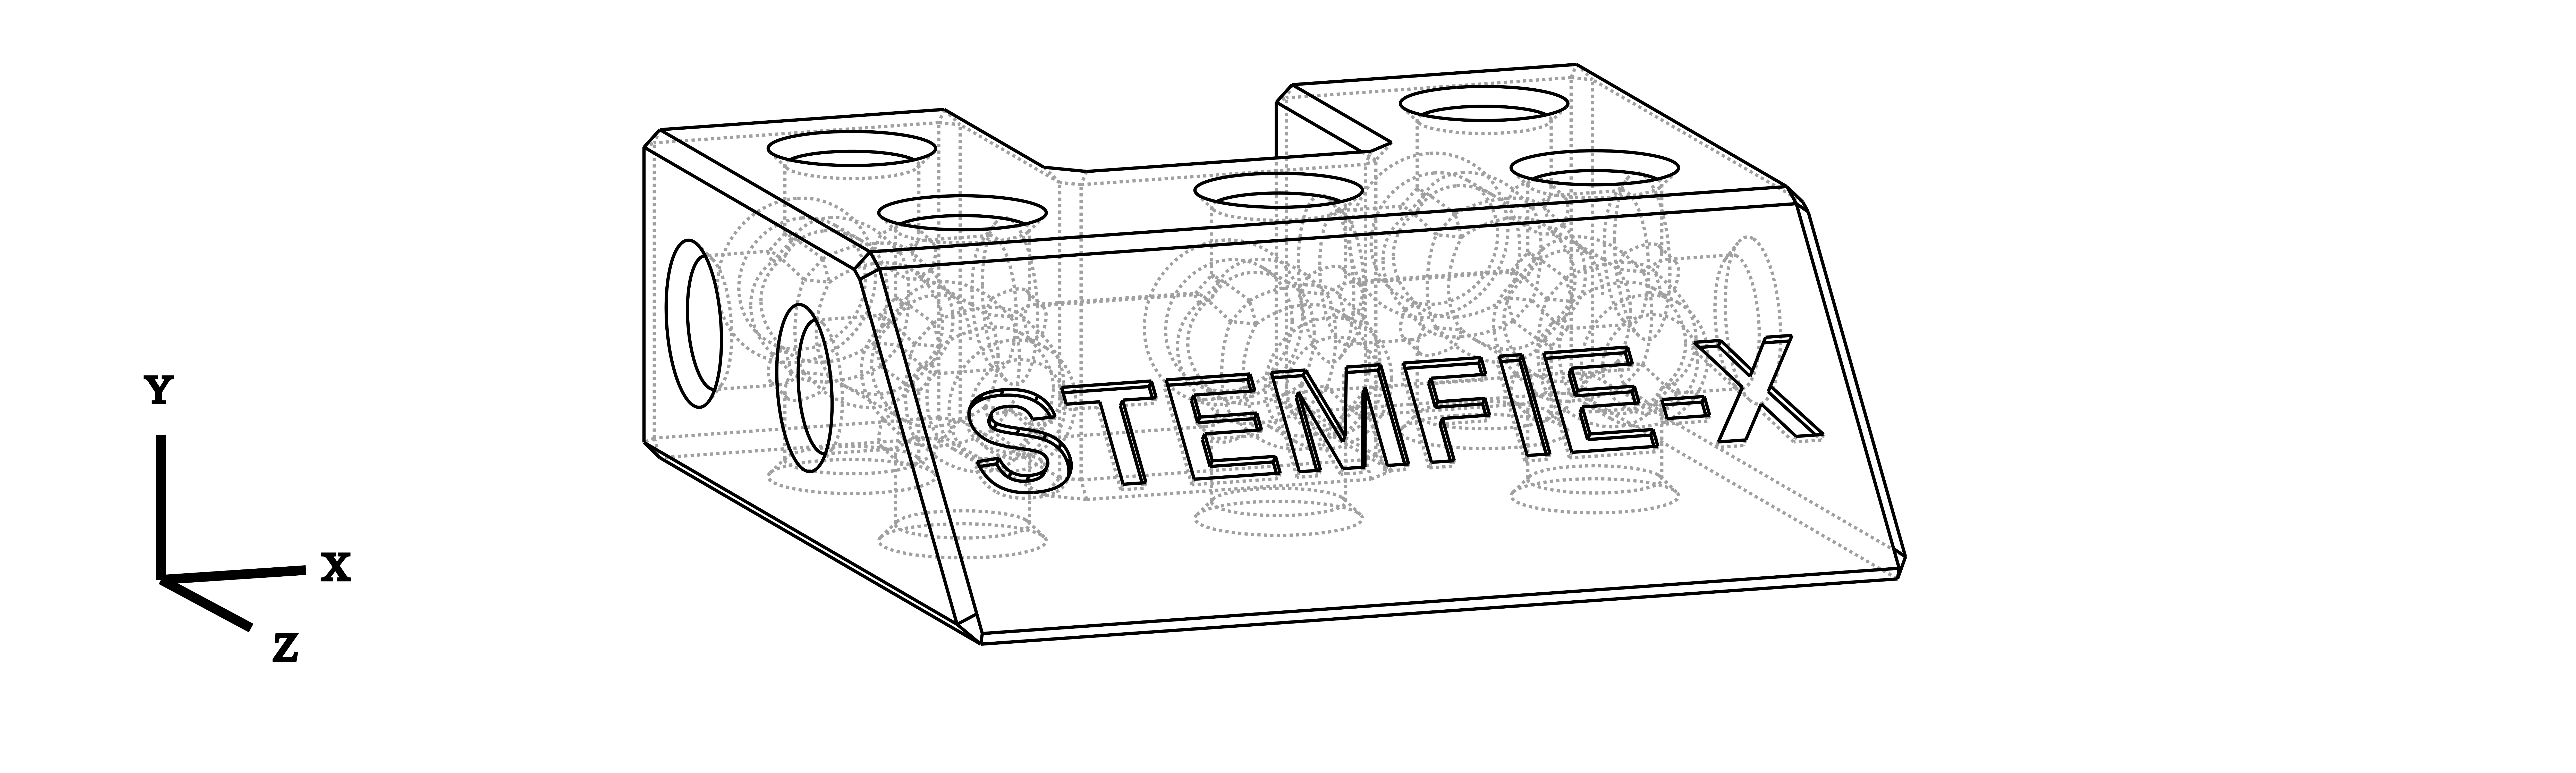

In [2]:
from IPython.display import Image
from lib import *

class Beam_Front(Stemfie_X): 
    def __init__(self):
        bf1 = Beam_Block(3).BU_Tx(-1)
        bf2 = Beam_Block(2).Rz()
        bf3 = bf2.copy().BU_Tx(2)
        bf1.U([bf2,bf3])
        
        bf4 = BU_Polyline( [[0,0],[0,1], [1,1]], height=3).Ry(-90).BU_Txy([2,-1])
        bf1.U(bf4)
        
        # chamfer
        bf1.obj= bf1.obj.faces().chamfer(.5)
        bf1.obj = bf1.obj.faces(">(0, -1, 1)").workplane(origin=(5, 0, 0))
        bf1.obj = bf1.obj.text("STEMFIE-X", 5, -0.3, kind='bold') 
        
        self.obj = bf1.obj

b1 = Beam_Front().Rx(-90)
convert_to_image(b1,'./img/beam_front')
Image('./img/beam_front.png', width=400)

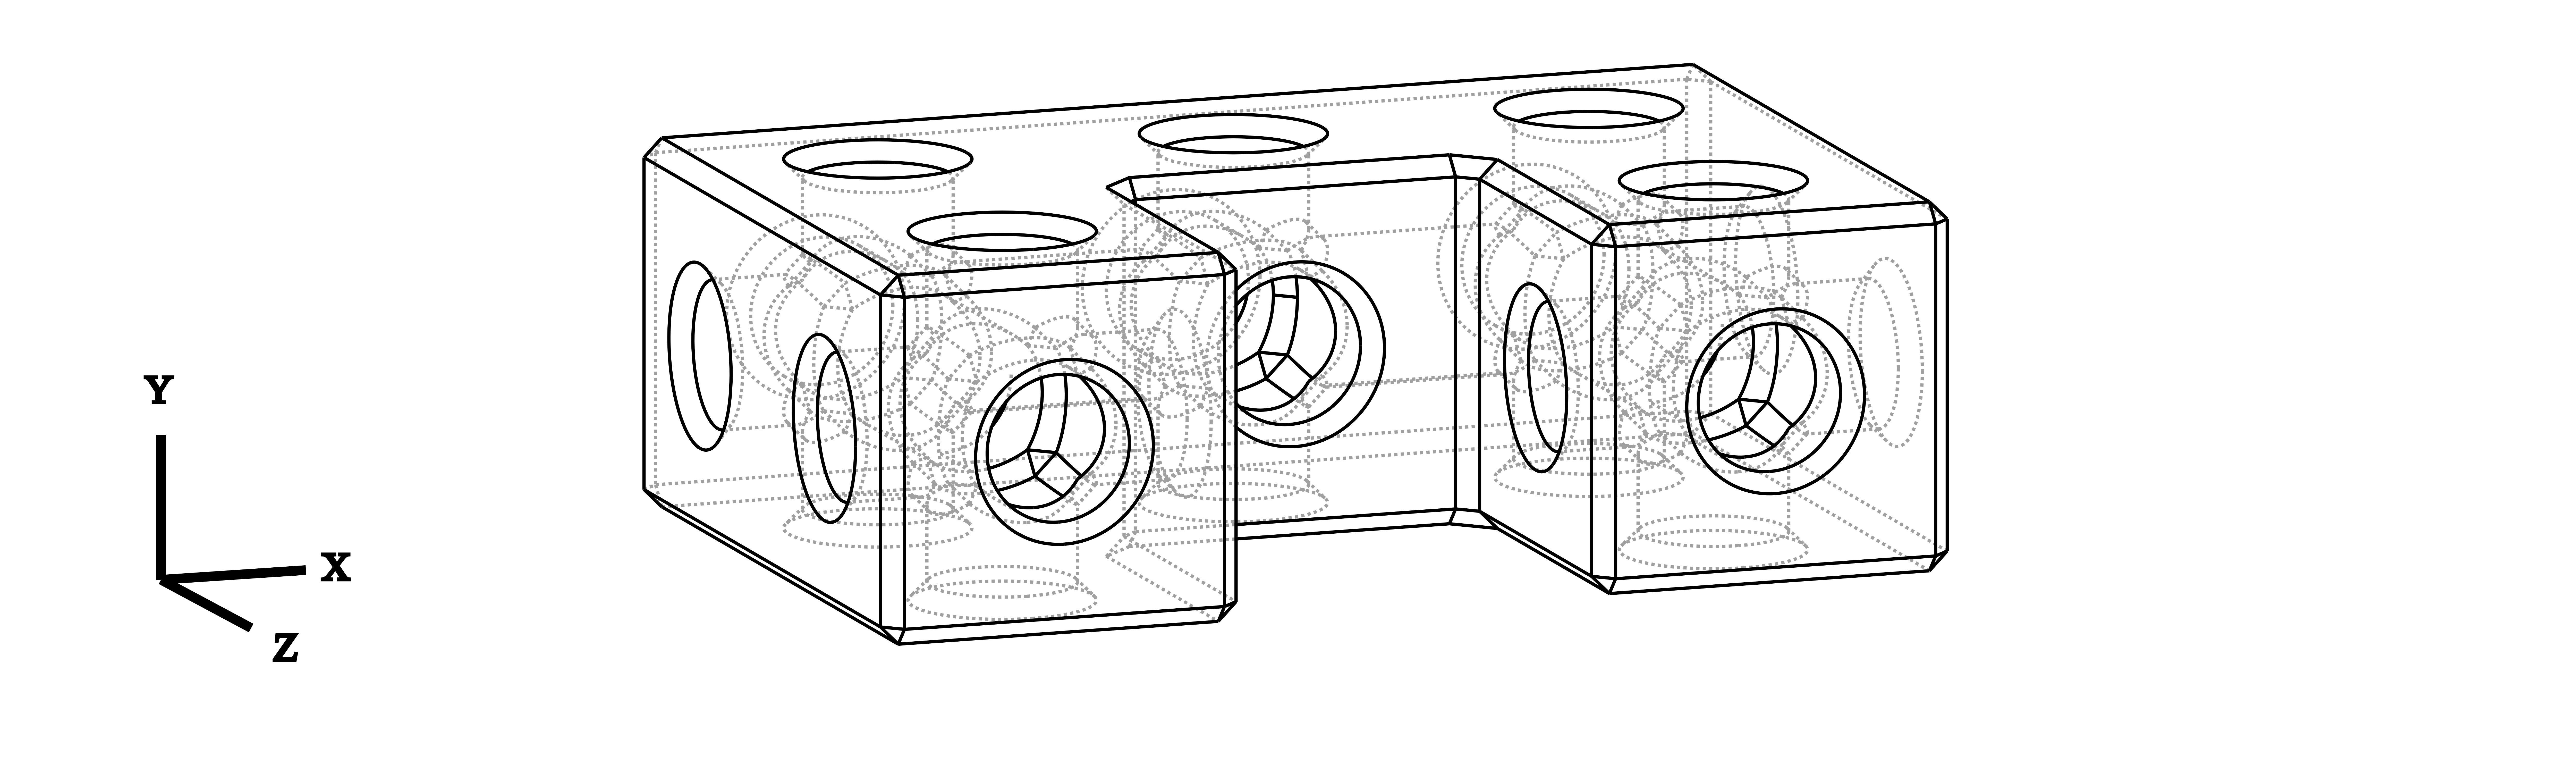

In [3]:
class Beam_uShape(Stemfie_X):
    def __init__(self):
        bs1 = Beam_Block(3).BU_Tx(-1)
        bs2 = Beam_Block(2).Rz()
        bs3 = bs2.copy().BU_Tx(2)
        bs1.U([bs2,bs3])

        bs1.obj = bs1.obj.faces().chamfer(.5)
        self.obj = bs1.obj

b2 = Beam_uShape().Rx(90)
#display(b2.obj)
convert_to_image(b2,'./img/beam_u')
Image('./img/beam_u.png', width=400)

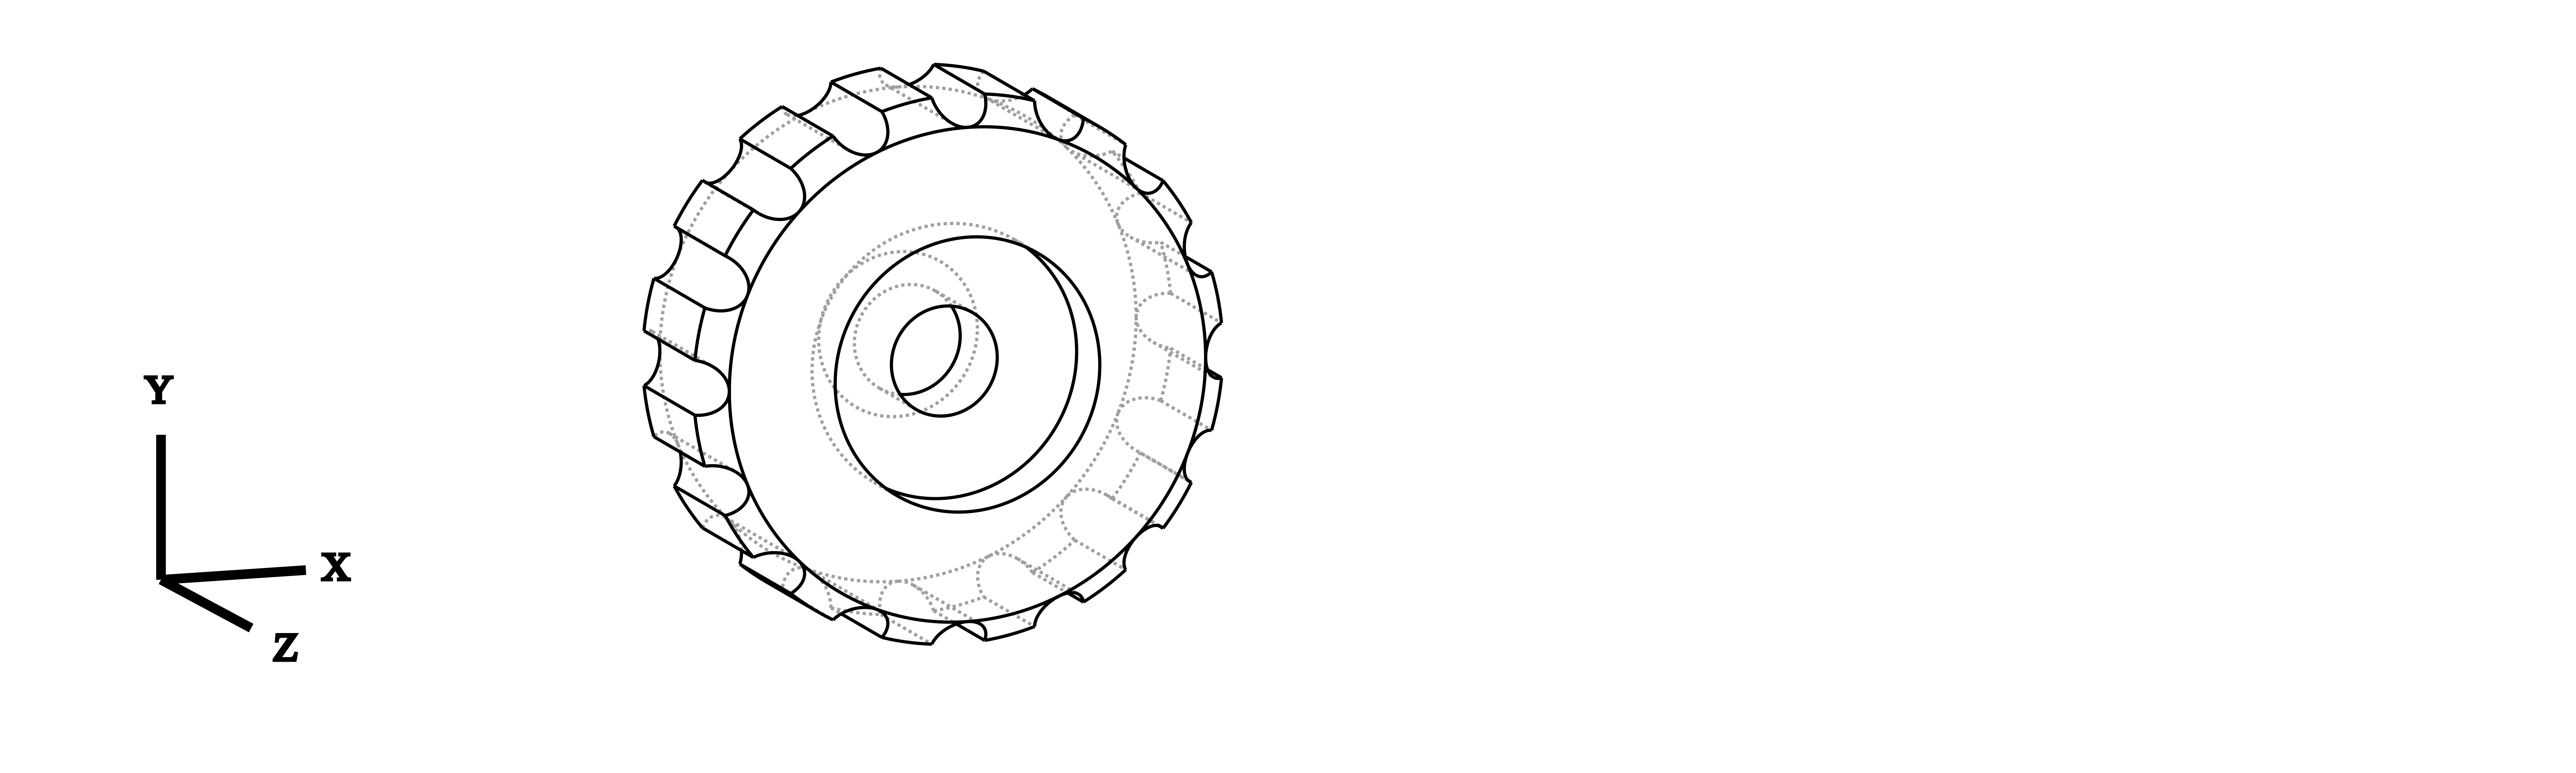

In [4]:
class Wheel(Stemfie_X):
    def __init__(self):
        w1 = BU_Cylinder(2, 1/2+1/4, hole=True)
        w1.obj= w1.obj.faces().chamfer(1)
        
        w2 = BU_Cylinder(1, 1/4, hole=True).BU_Tz(1/2-1/4)
        w1.D(w2)
        
        N = 16                         # dezen
        r = 10
        gamma = np.pi*2/N
        ds = cq.Workplane('XY')
        for n in range(N):
            hx = np.cos(gamma*n)*r
            hy = np.sin(gamma*n)*r
            ds = ds.moveTo(hx,hy)
            ds = ds.cylinder(20, 1)
        
        w1.obj = w1.obj.cut(ds)
        self.obj = w1.obj

w = Wheel()
#display(w.obj)
convert_to_image(w,'./img/whell')
Image('./img/whell.png', width=500)

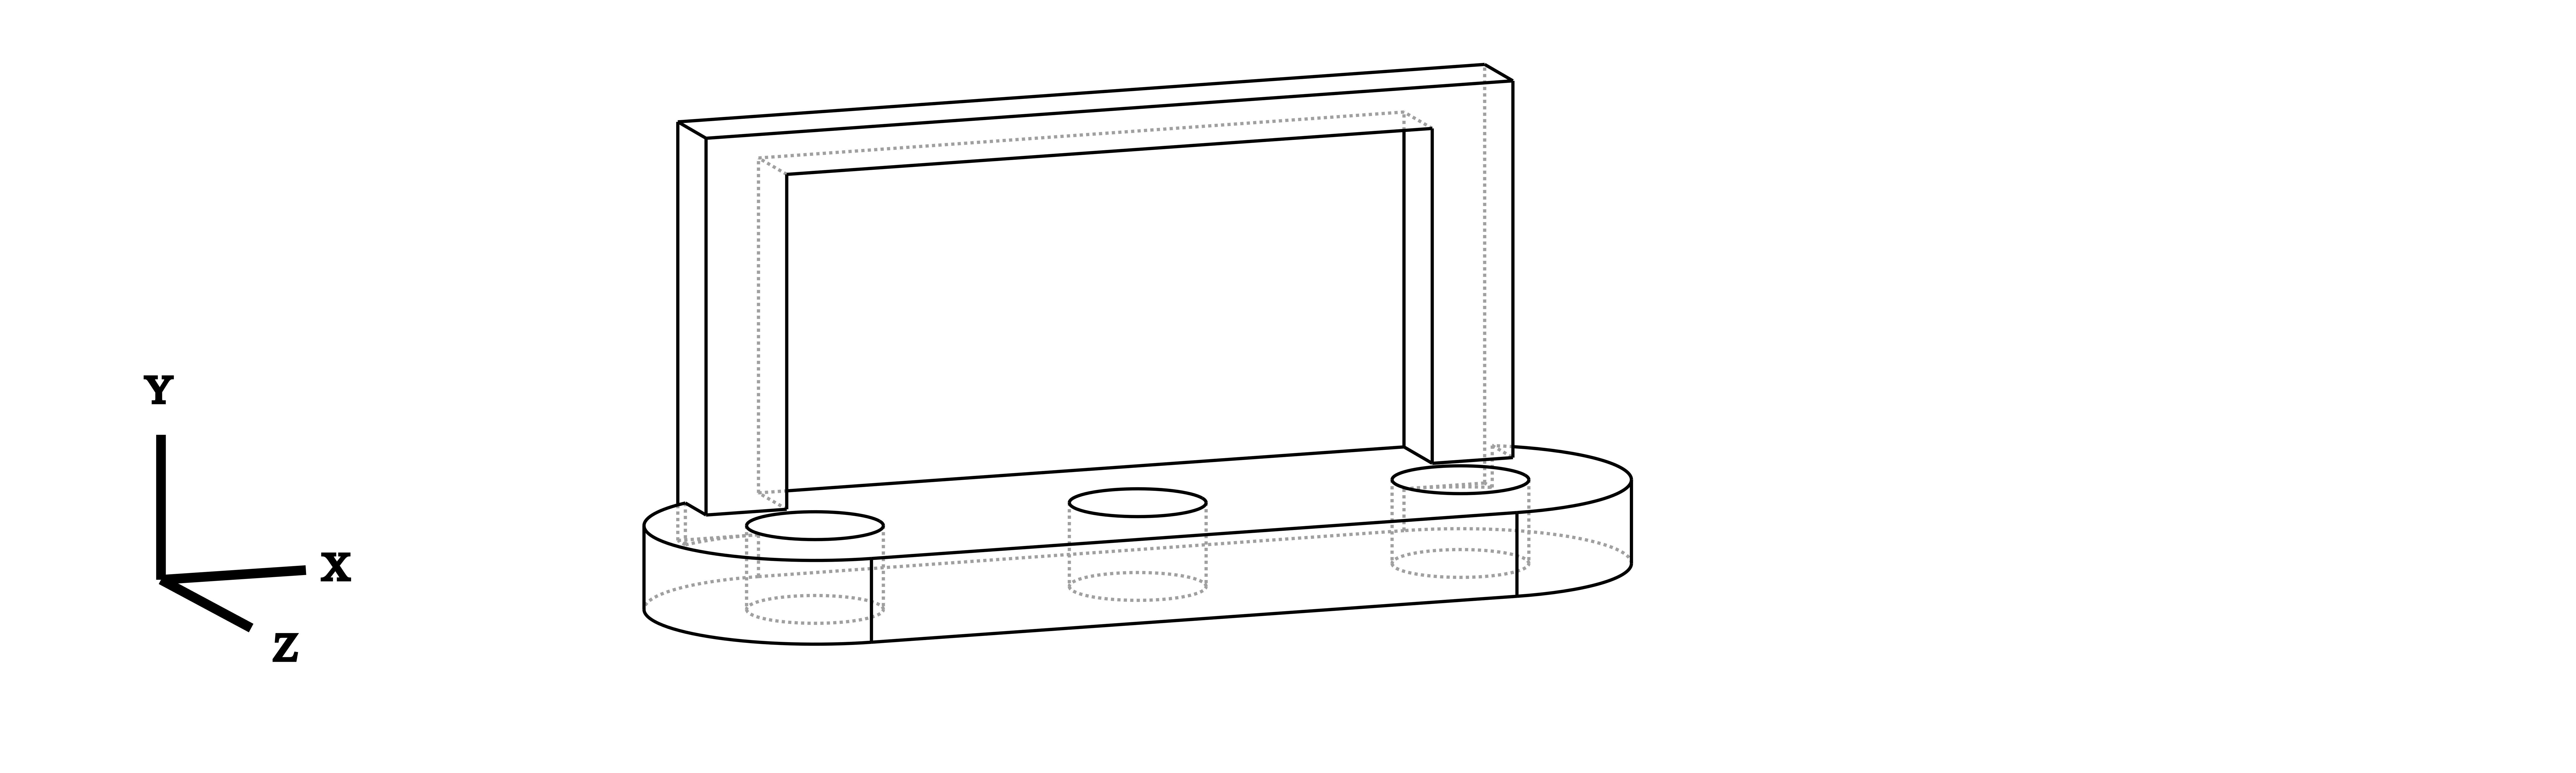

In [5]:
class Brace_Window(Stemfie_X):
    def __init__(self):
        q1 = BU_Cube([2+1/2, 1/4, 1+1/4], center=False)
        q2 = BU_Cube([2+1/2-1/2, 1/4, 1+1/4-1/4], center=False).BU_T([1/4, 0, 1/8])
        q1.D(q2).BU_T([-1/4, 1/4, 1/8])
        q3 = Brace(3, 1/4)
        q1.U(q3)
        self.obj = q1.obj

q = Brace_Window().Rx(-90)
#display(q.obj)
convert_to_image(q,'./img/window')
Image('./img/window.png', width=500)

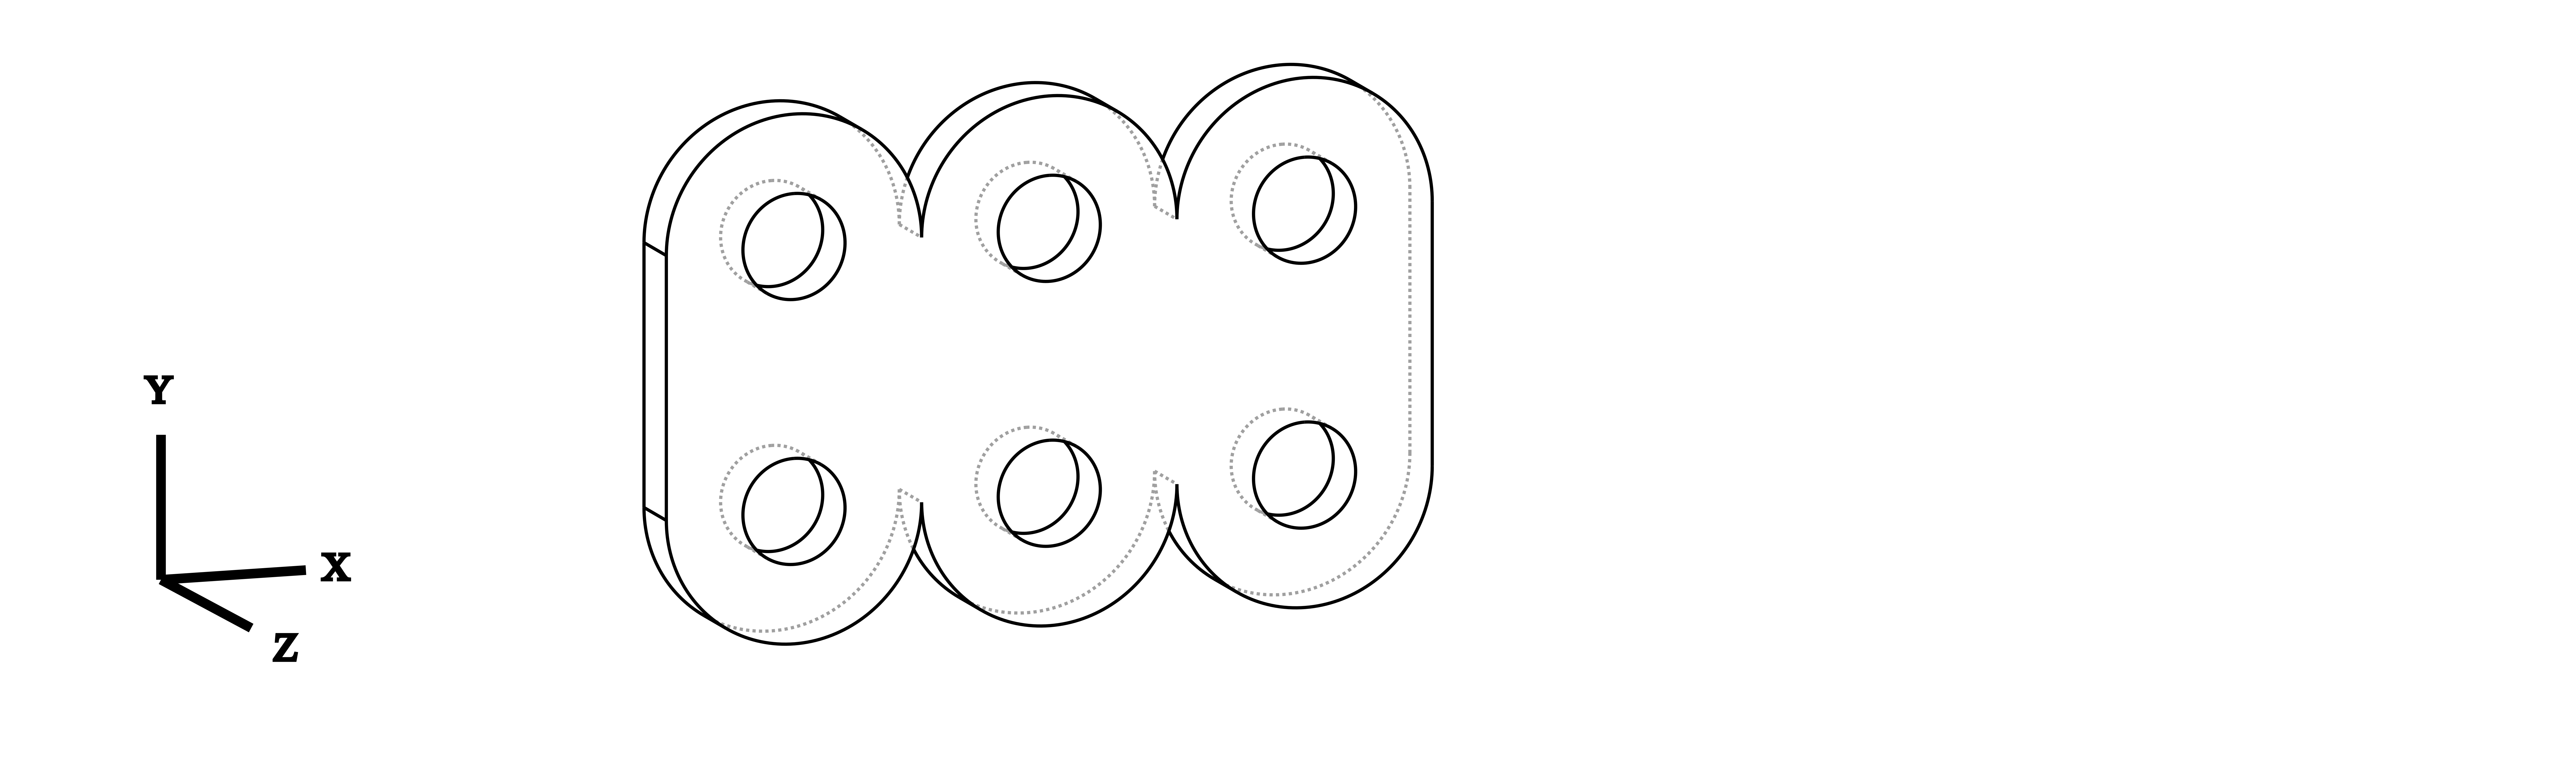

In [6]:
class Brace_Motor(Stemfie_X):
    def __init__(self):
        a1 = Brace(2, 1/4)
        a2 = Brace(2, 1/4).BU_Ty( 1)
        a3 = Brace(2, 1/4).BU_Ty(-1)
        a1.U([a2,a3])
        self.obj = a1.obj
m = Brace_Motor().Rz()
#display(m.obj)
convert_to_image(m,'./img/motor')
Image('./img/motor.png', width=500)

### <font color='purple'> <b> Building </b></font>

    Material   - PLA
    STL Files  - ./examples/05_simple_car_stl
    Axes       - plastic welding rod 4mm - ABS for plastic welding
    Screews    - standard DIN913 M4 Inner Hexagon Socket Set Screw, 8mm length (imbus)

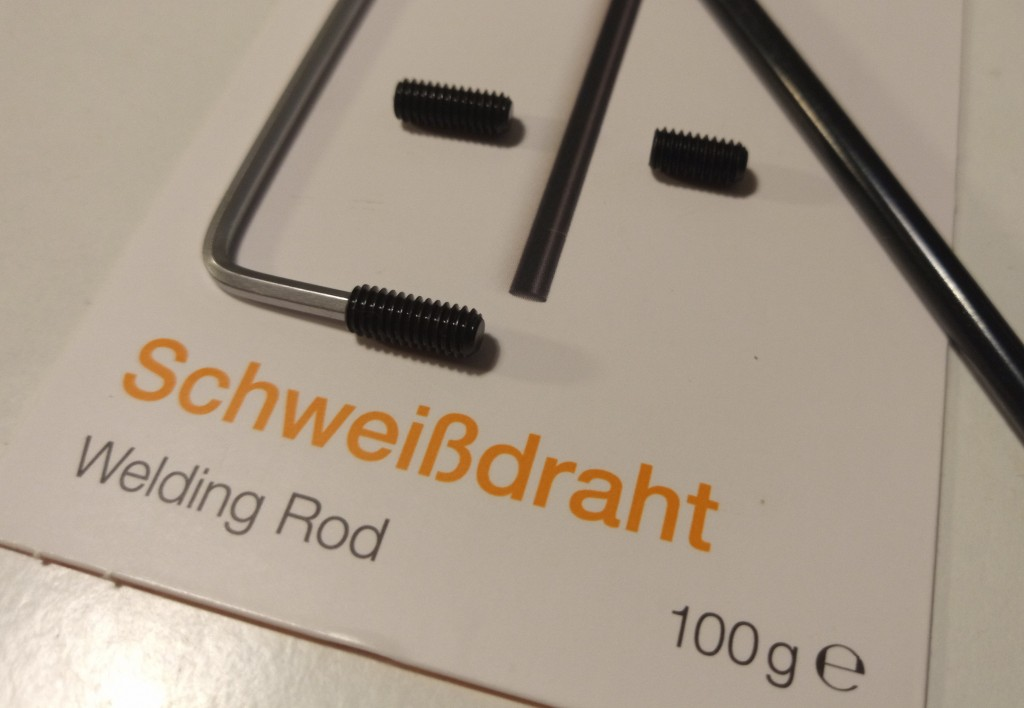

In [4]:
Image(filename='./img/car_building.jpg', width=500)